In [1]:
import cv2
import requests
import numpy as np
import matplotlib.pyplot as plt

def url_imread(url: str) -> np.ndarray:
    img_array = np.asarray(bytearray(requests.get(image_url).content), dtype=np.uint8)
    return cv2.imdecode(img_array, cv2.IMREAD_COLOR)

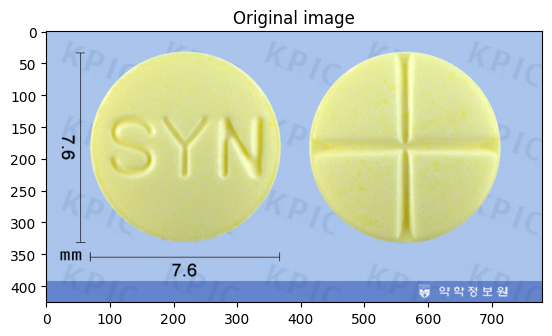

In [2]:
image_url = 'https://www.pharm.or.kr/images/sb_photo/big3/A11A1310A007101.jpg'
image = url_imread(image_url)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_RGB2BGR))
plt.title('Original image')
plt.show()

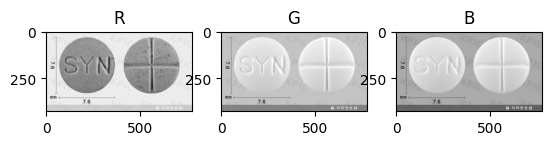

In [3]:
plt.subplot(1, 3, 1)
plt.imshow(image[:,:,0], cmap='gray')
plt.title('R')

plt.subplot(1, 3, 2)
plt.imshow(image[:,:,1], cmap='gray')
plt.title('G')

plt.subplot(1, 3, 3)
plt.imshow(image[:,:,2], cmap='gray')
plt.title('B')

plt.show()

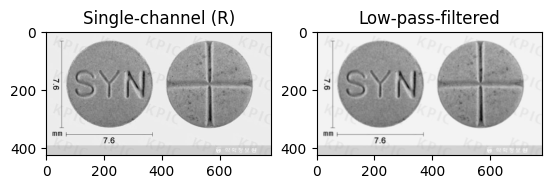

In [4]:
image_gry = image[:,:,0]
image_lpf = cv2.GaussianBlur(image_gry, (7,7), 1)

plt.subplot(1, 2, 1)
plt.imshow(image_gry, cmap='gray')
plt.title('Single-channel (R)')

plt.subplot(1, 2, 2)
plt.imshow(image_lpf, cmap='gray')
plt.title('Low-pass-filtered')

plt.show()

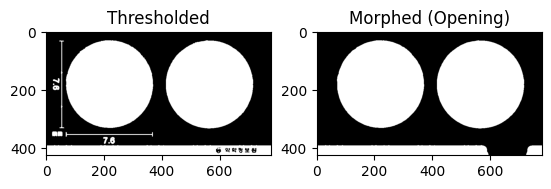

In [5]:
image_bin = cv2.threshold(image_lpf, 216, 255, cv2.THRESH_BINARY_INV)[1]
image_mrp = cv2.morphologyEx(image_bin, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (31, 31)))

plt.subplot(1, 2, 1)
plt.imshow(image_bin, cmap='gray')
plt.title('Thresholded')

plt.subplot(1, 2, 2)
plt.imshow(image_mrp, cmap='gray')
plt.title('Morphed (Opening)')

plt.show()

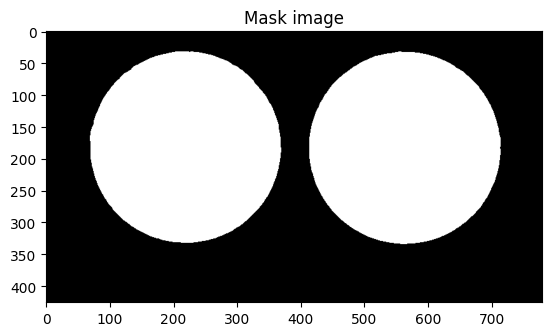

In [6]:
image_msk = image_mrp.copy()
image_msk[380:,:] = 0

image_out = np.zeros_like(image)
cv2.copyTo(image, image_msk, image_out)

plt.imshow(image_msk, cmap='gray')
plt.title('Mask image')
plt.show()

Text(0.5, 1.0, 'Masked image')

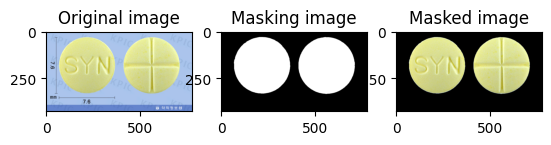

In [7]:
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_RGB2BGR))
plt.title('Original image')

plt.subplot(1, 3, 2)
plt.imshow(image_msk, cmap='gray')
plt.title('Masking image')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(image_out, cv2.COLOR_RGB2BGR), cmap='gray')
plt.title('Masked image')

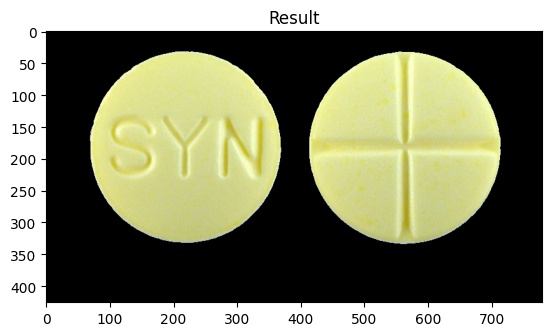

In [8]:
plt.imshow(cv2.cvtColor(image_out, cv2.COLOR_RGB2BGR))
plt.title('Result')
plt.show()